In [2]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

DIPlib -- a quantitative image analysis library
Version 3.5.2 (Dec 27 2024)
For more information see https://diplib.org


In [53]:
def measurement_pipeline(filename, background_se_size, line_se_size, integrate_dim, units_between_peaks,
                         peak_distance = None, rot_deg = 0):
    # Load original image
    image = dip.ImageRead(filename)
    print("Original image:")
    print(image)
    image.Show()

    # Convert to greyscale if it is not already
    if image.TensorElements() > 1:
        gray_image = dip.ColorSpaceManager.Convert(image, "gray")
        print("Converted to grayscale:")
        print(gray_image)
        gray_image.Show()

        image = gray_image

    # Apply cosing with large SE to estimate background illumination
    se = dip.SE(background_se_size, "elliptic")
    image_bg = dip.Closing(image, se)
    print("Estimated background illumination:")
    image_bg.Show()

    # Subtract background illumination from originali image (moving the values back to positive integers)
    # aka Black-Hat transformation
    image_clean = image - image_bg
    image_clean -= dip.Minimum(image_clean)
    print("Subtract background illumination from original (Black-Hat transformation)")
    image_clean.Show()

    # Apply segmentation on the cleaned image
    image_seg = dip.IsodataThreshold(image_clean)
    print("Segmentation on the cleaned image:")
    image_seg.Show()

    # Rotate image to align reticule
    if rot_deg != 0:
        image_seg = dip.Rotation2D(image_seg, angle=np.deg2rad(rot_deg))
        print("Rotate image to align reticle:")
        image_seg.Show()

    # Perform closing using a line SE to remove opposite lines
    line_se = dip.SE(line_se_size, "rectangular")
    image_lines = dip.Closing(image_seg, line_se)
    print("Closing using line SE:")
    image_lines.Show()

    # Integrate over the rows
    np_lines = np.array(image_lines)
    np_lines_count = np_lines.sum(axis=integrate_dim)
    plt.plot(np_lines_count)

    # Find the minima over the columns to detect line position
    peaks, _ = find_peaks(-np_lines_count, distance=peak_distance)
    plt.plot(peaks, np_lines_count[peaks], 'x')

    print("Peak positions when integrating over image columns:")
    plt.show()

    # Calculate distance between peaks
    peak_distance = peaks[1:] - peaks[:-1]
    print(f"Distance between peaks: {peak_distance}")

    def reject_outliers(data, m=1):
        return data[abs(data - np.mean(data)) < m * np.std(data)]

    # Remove outliers in peak distances
    filtered_peak_distance = reject_outliers(peak_distance)
    print(f"Removing outliers: {filtered_peak_distance}")

    # Calculate mean peak distance
    mean_peak_distance = filtered_peak_distance.mean()
    print(f"Mean peak distance: {mean_peak_distance}")

    # Calculate units-per pixel size
    units_per_pixel = units_between_peaks / mean_peak_distance
    print(f"Units-per pixel size: {units_per_pixel}")



# Part 3.1

2025Assignment03Images/CamIm01.tif

Original image:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b931ba7cea0 (shared among 1 images)
    origin pointer: 0x5b931ba7cea0



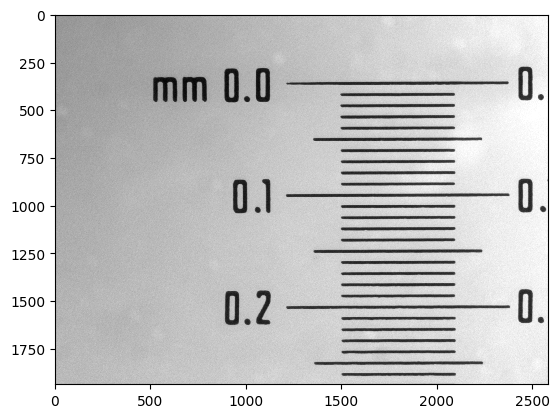

Converted to grayscale:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b931ba7cea0 (shared among 2 images)
    origin pointer: 0x5b931ba7cea0



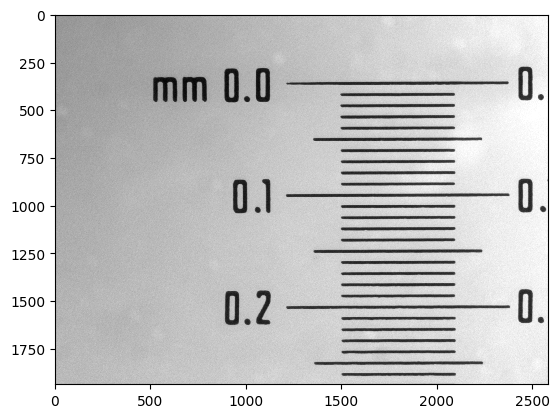

Estimated background illumination:


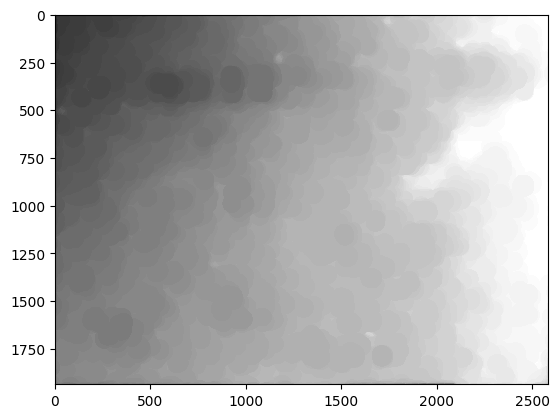

Subtract background illumination from original (Black-Hat transformation)


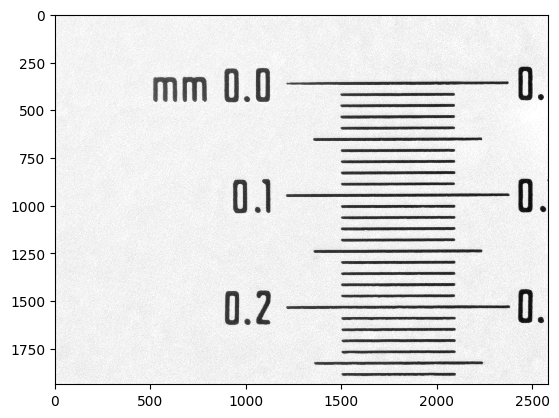

Segmentation on the cleaned image:


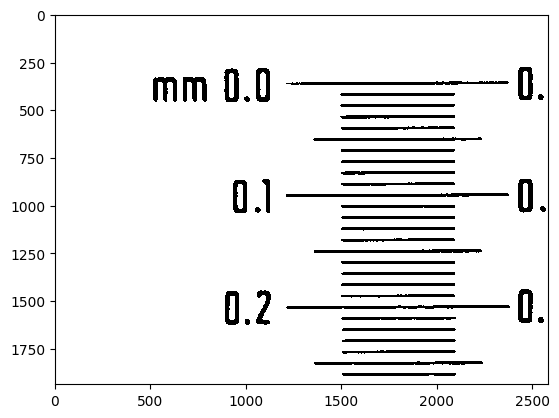

Closing using line SE:


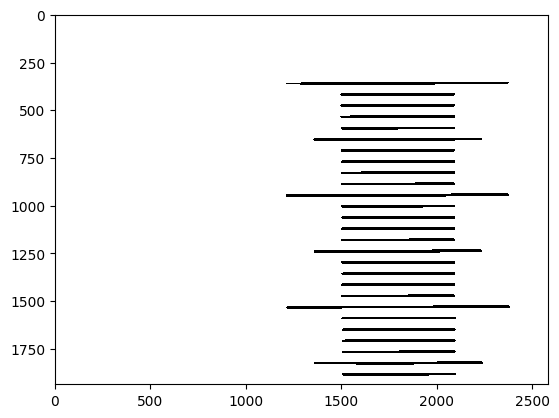

Peak positions when integrating over image columns:


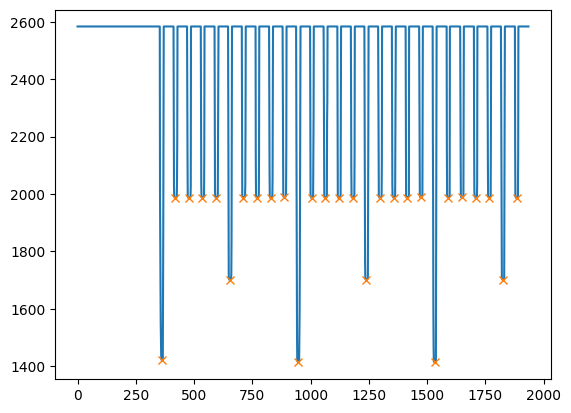

Distance between peaks: [58 58 58 59 59 57 60 58 59 59 59 58 59 59 58 59 58 57 60 59 58 60 57 59
 59 58]
Removing outliers: [58 58 58 59 59 58 59 59 59 58 59 59 58 59 58 59 58 59 59 58]
Mean peak distance: 58.55
Units-per pixel size: 0.1707941929974381

2025Assignment03Images/CamIm02.tif

Original image:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b9320664670 (shared among 1 images)
    origin pointer: 0x5b9320664670



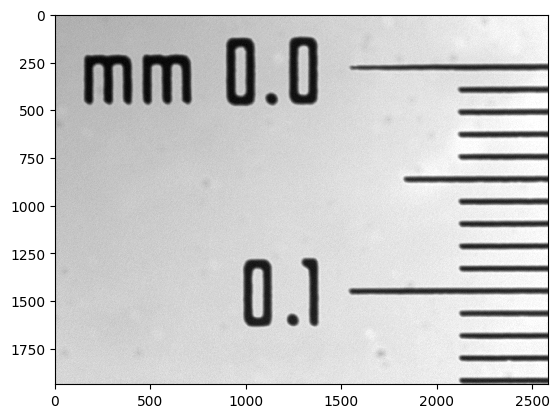

Converted to grayscale:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b9320664670 (shared among 2 images)
    origin pointer: 0x5b9320664670



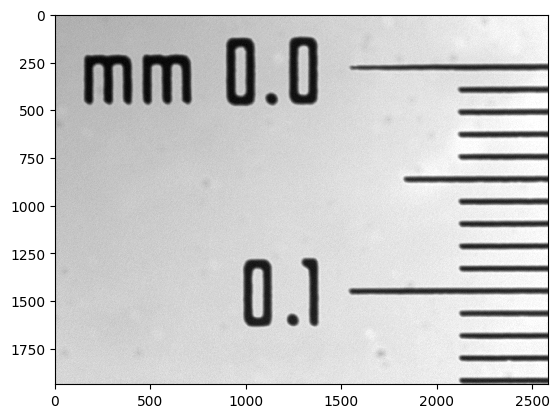

Estimated background illumination:


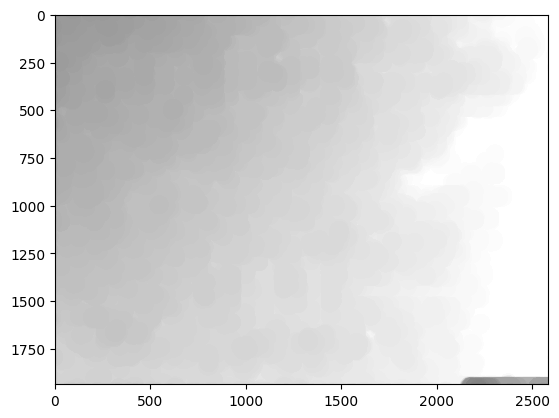

Subtract background illumination from original (Black-Hat transformation)


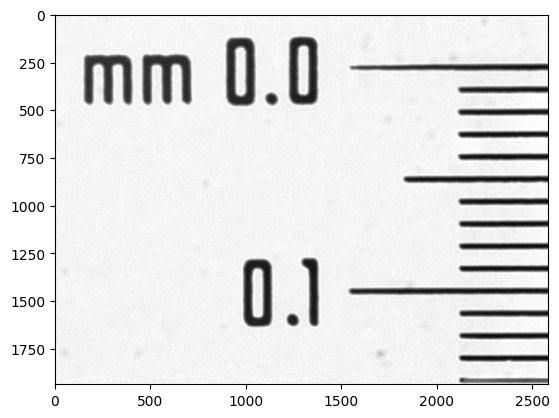

Segmentation on the cleaned image:


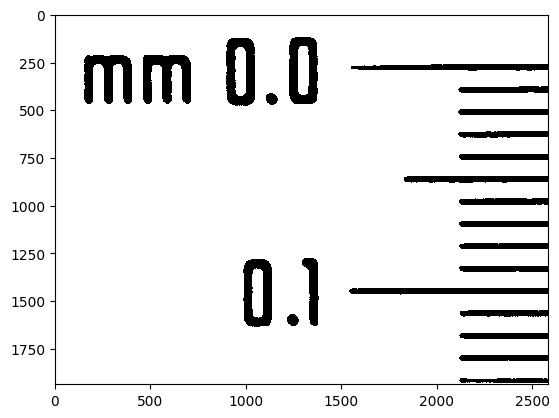

Closing using line SE:


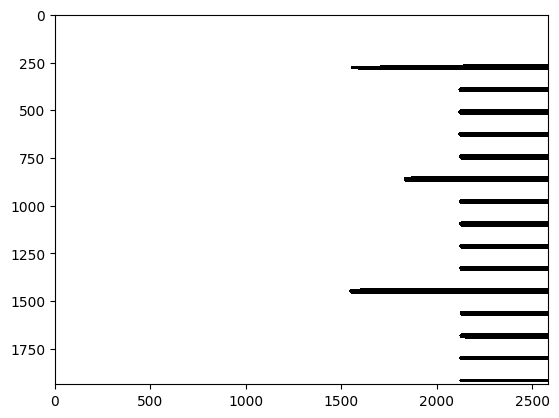

Peak positions when integrating over image columns:


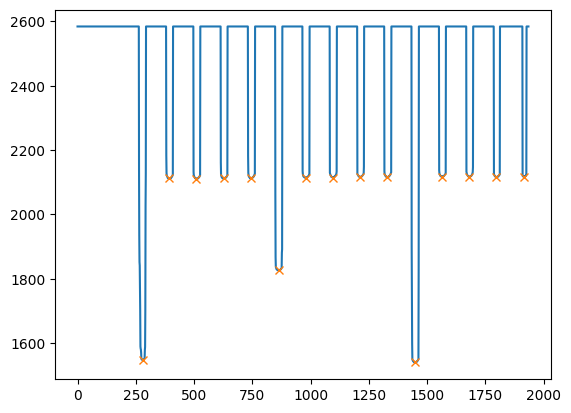

Distance between peaks: [113 116 117 119 118 116 116 118 114 120 116 117 116 120]
Removing outliers: [116 117 118 116 116 118 116 117 116]
Mean peak distance: 116.66666666666667
Units-per pixel size: 0.08571428571428572

2025Assignment03Images/CamIm03.tif

Original image:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b9322791310 (shared among 1 images)
    origin pointer: 0x5b9322791310



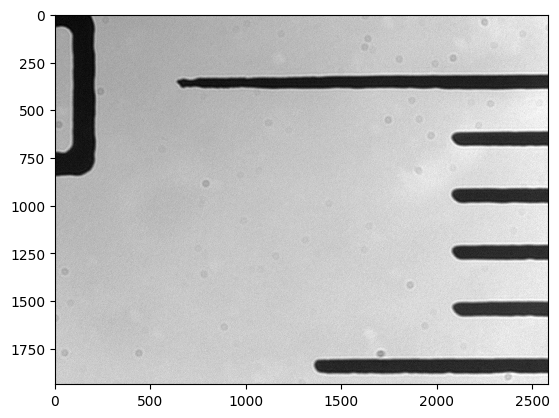

Converted to grayscale:
2D Scalar image:
    data type:      UINT8
    sizes:          {2584, 1936}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 2584}, tensor stride 1
    data pointer:   0x5b9322791310 (shared among 2 images)
    origin pointer: 0x5b9322791310



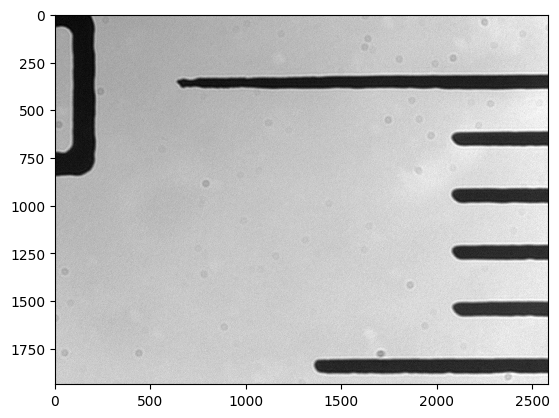

Estimated background illumination:


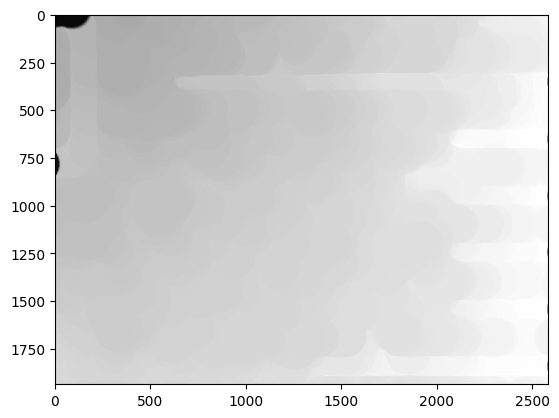

Subtract background illumination from original (Black-Hat transformation)


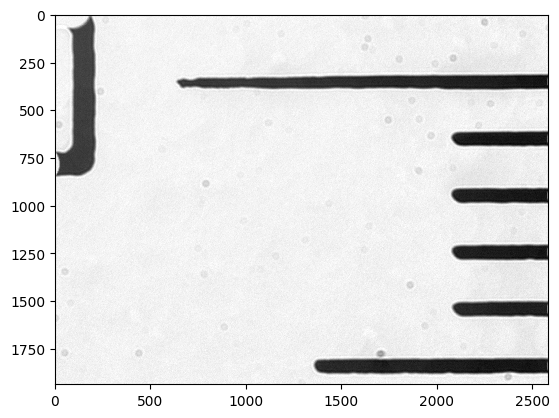

Segmentation on the cleaned image:


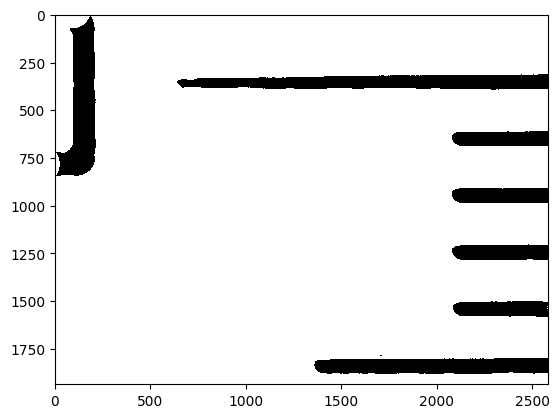

Closing using line SE:


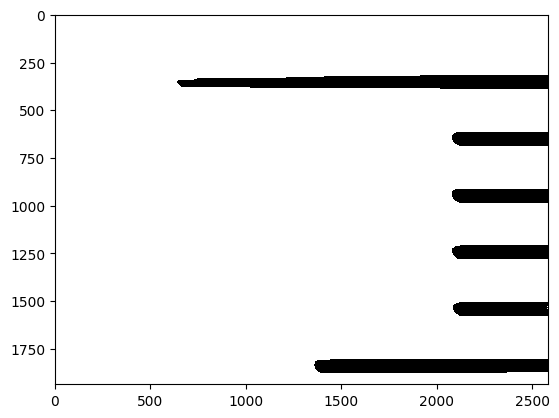

Peak positions when integrating over image columns:


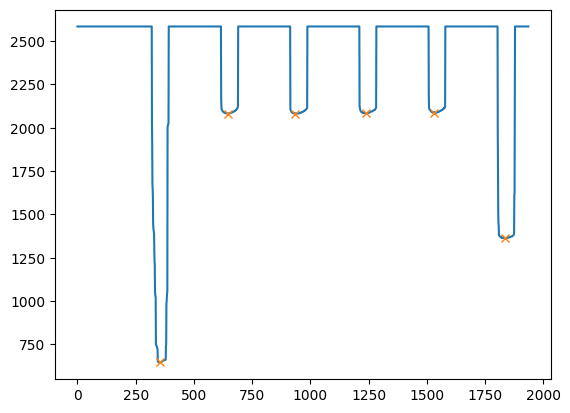

Distance between peaks: [293 288 305 293 301]
Removing outliers: [293 293 301]
Mean peak distance: 295.6666666666667
Units-per pixel size: 0.033821871476888386


In [ ]:
file1 = "2025Assignment03Images/CamIm01.tif"
file2 = "2025Assignment03Images/CamIm02.tif"
file3 = "2025Assignment03Images/CamIm03.tif"

print(file1)
print("")
measurement_pipeline(file1, background_se_size=100, line_se_size=(200,1), integrate_dim=1, units_between_peaks=10)
print("")
print(file2)
print("")
measurement_pipeline(file2, background_se_size=100, line_se_size=(400,1), integrate_dim=1, units_between_peaks=10)
print("")
print(file3)
print("")
measurement_pipeline(file3, background_se_size=200, line_se_size=(400,1), integrate_dim=1, units_between_peaks=10,
                     peak_distance=100)


# Part 3.3

2025Assignment03Images/scale-img.ics

Original image:
2D Scalar image:
    data type:      SFLOAT
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   0x5b931a60e980 (shared among 1 images)
    origin pointer: 0x5b931a60e980



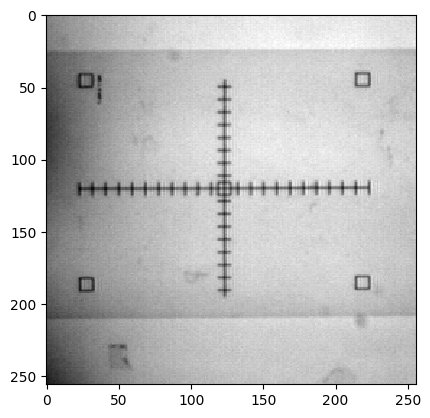

Estimated background illumination:


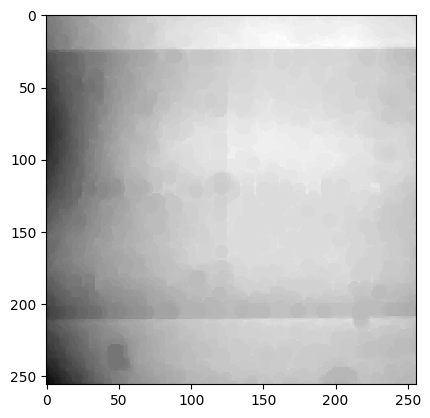

Subtract background illumination from original (Black-Hat transformation)


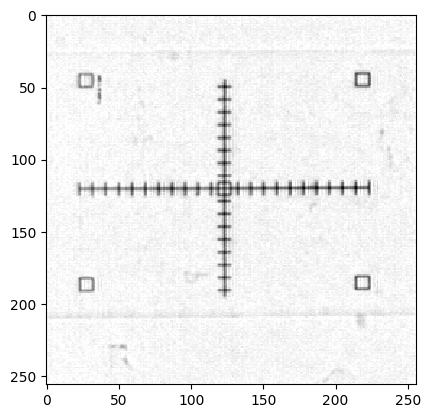

Segmentation on the cleaned image:


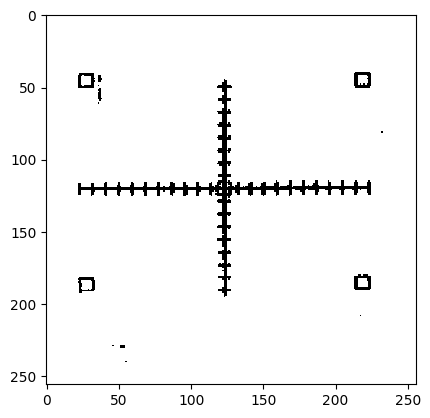

Closing using line SE:


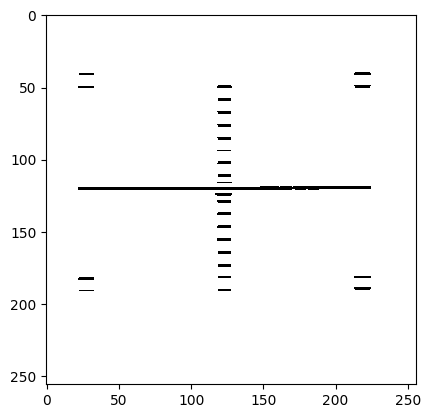

Peak positions when integrating over image columns:


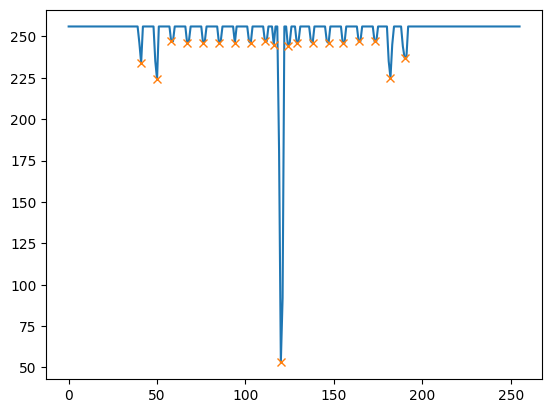

Distance between peaks: [9 8 9 9 9 9 9 8 5 4 4 5 9 9 8 9 9 9 8]
Removing outliers: [9 8 9 9 9 9 9 8 9 9 8 9 9 9 8]
Mean peak distance: 8.733333333333333
Units-per pixel size: 0.11450381679389314


In [ ]:
file = "2025Assignment03Images/scale-img.ics"

print(file)
print("")
measurement_pipeline(file, background_se_size=10, line_se_size=(8,1), integrate_dim=1, units_between_peaks=1)

# 3.4

2025Assignment03Images/CamIm04.tif

Original image:
2D Color image (3x1 column vector, 3 elements, sRGB):
    data type:      UINT8
    sizes:          {1292, 968}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {3, 3876}, tensor stride 1
    data pointer:   0x5b931a9d8040 (shared among 1 images)
    origin pointer: 0x5b931a9d8040



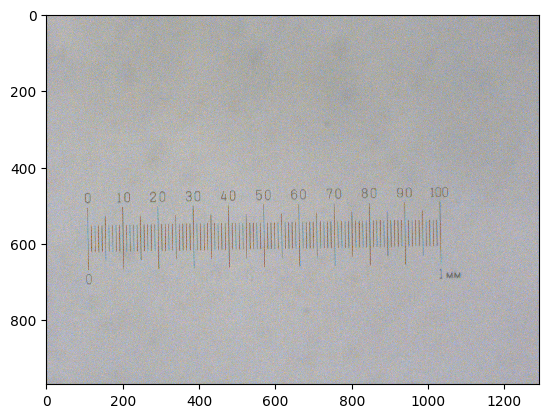

Converted to grayscale:
2D Scalar image:
    data type:      SFLOAT
    sizes:          {1292, 968}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 1292}, tensor stride 1
    data pointer:   0x5b931ccc42e0 (shared among 1 images)
    origin pointer: 0x5b931ccc42e0



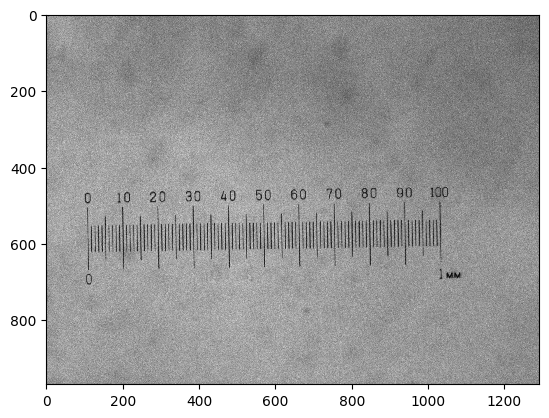

Estimated background illumination:


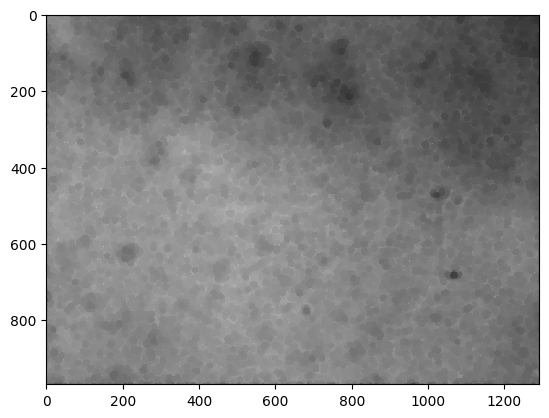

Subtract background illumination from original (Black-Hat transformation)


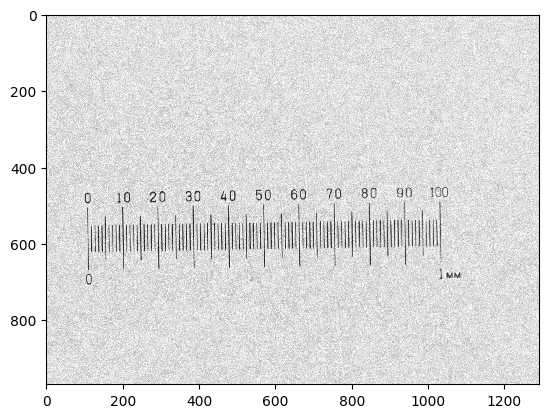

Segmentation on the cleaned image:


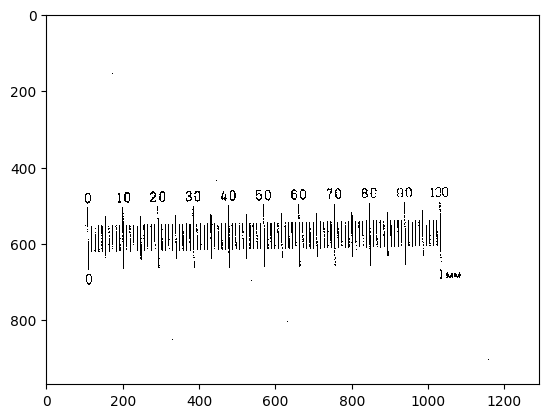

Closing using line SE:


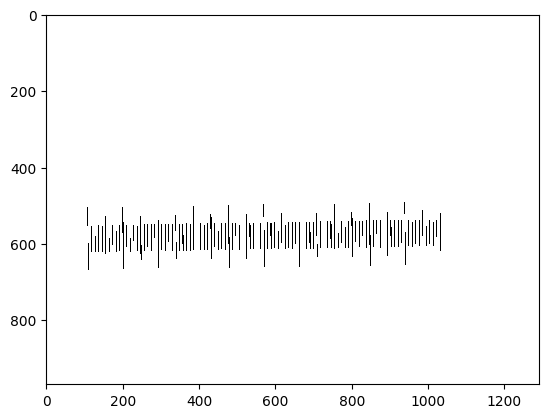

Peak positions when integrating over image columns:


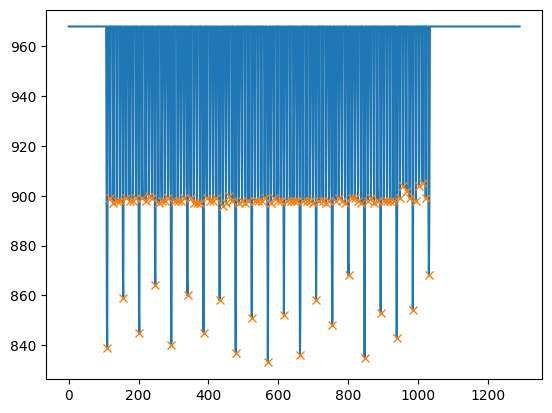

Distance between peaks: [ 9  9  9  9 10  9  9  9  9 10  9  9  9  9 10  9  9  9  9  9 10  9  9  9
 10  9  9  9 10  9  9  9  9  9 10  9  9  9  9 10  9  9  9  9 10  9  9 10
  9  9  9  9 10  9  9  9 10  9  9  9 10  9  9  9  9  9 10  9  9  9 10  9
  9  9 10  9  9  9 10  9  9  9  9 10  9  9  9 10  9  9  9 10  9  9  9  9
  9 10  9  9]
Removing outliers: [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9]
Mean peak distance: 9.0
Units-per pixel size: 0.1111111111111111


In [55]:
file = "2025Assignment03Images/CamIm04.tif"

print(file)
print("")
measurement_pipeline(file, background_se_size=15, line_se_size=(1,32), integrate_dim=0, units_between_peaks=1)
